In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# data = pd.read_csv(r'../data/processed/TopDown/max/STD/Image_15_max_STD.csv')

for i in range(20, 21):
    # data = pd.read_csv(r'..\data\processed\TopDown\max\STD\Image_'+str(i+1)+'_max_STD.csv')
    data_max_std = pd.read_csv(r'../data/processed/TopDown/max/STD/Image_'+str(i+1)+'_max_STD.csv')
    data_min_std = pd.read_csv(r'../data/processed/TopDown/min/STD/Image_'+str(i+1)+'_min_STD.csv')
    data_mean_std = pd.read_csv(r'../data/processed/TopDown/mean/STD/Image_'+str(i+1)+'_mean_STD.csv')
    data_max_entropy = pd.read_csv(r'../data/processed/TopDown/max/Entropy/Image_'+str(i+1)+'_max_Entropy.csv')
    data_min_entropy = pd.read_csv(r'../data/processed/TopDown/min/Entropy/Image_'+str(i+1)+'_min_Entropy.csv')
    data_mean_entropy = pd.read_csv(r'../data/processed/TopDown/mean/Entropy/Image_'+str(i+1)+'_mean_Entropy.csv')
    
    # Merge dataframes based on x, y coordinates
    combined_df = pd.DataFrame()
    combined_df['max_STD'] = data_max_std['max_STD']
    combined_df['min_STD'] = data_min_std['min_STD']
    combined_df['mean_STD'] = data_mean_std['mean_STD']
    combined_df['max_Entropy'] = data_max_entropy['max_Entropy']
    combined_df['min_Entropy'] = data_min_entropy['min_Entropy']
    combined_df['mean_Entropy'] = data_mean_entropy['mean_Entropy']
    combined_df['depth_value'] = data_mean_entropy['depth_value']

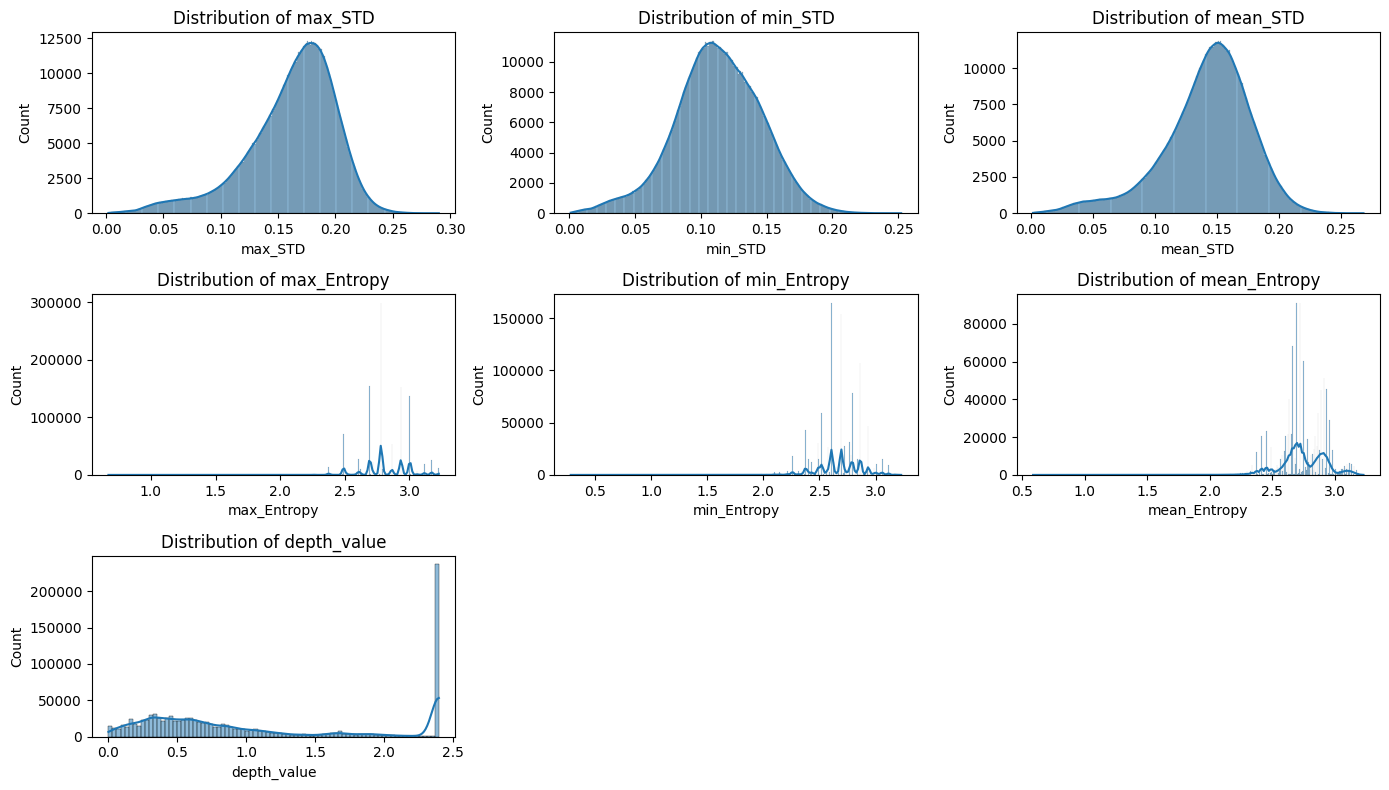

In [46]:
# # Visualizing feature distributions
features = ['max_STD', 'min_STD', 'mean_STD', 'max_Entropy', 'min_Entropy', 'mean_Entropy', 'depth_value']
plt.figure(figsize=(14, 8))
for idx, feature in enumerate(features):
    plt.subplot(3, 3, idx + 1)
    sns.histplot(combined_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

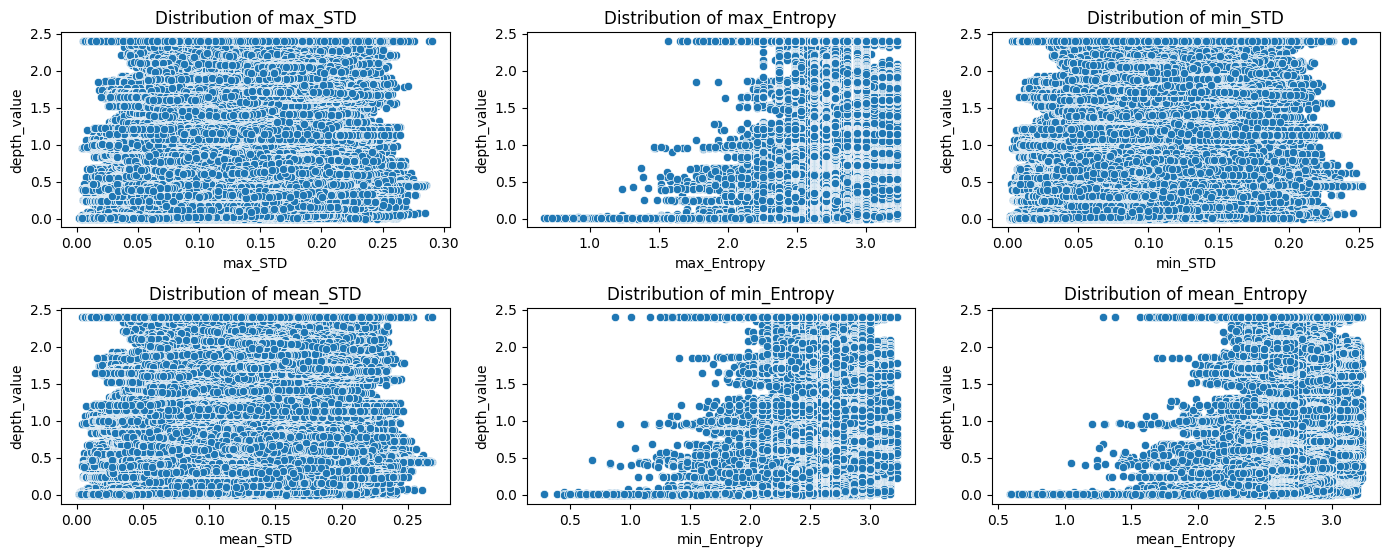

In [50]:
# # Visualizing feature distributions
features = ['max_STD', 'max_Entropy', 'min_STD', 'mean_STD', 'min_Entropy', 'mean_Entropy']
plt.figure(figsize=(14, 8))
for idx, feature in enumerate(features):
    plt.subplot(3, 3, idx + 1)
    sns.scatterplot(x=combined_df[feature], y=combined_df['depth_value'])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

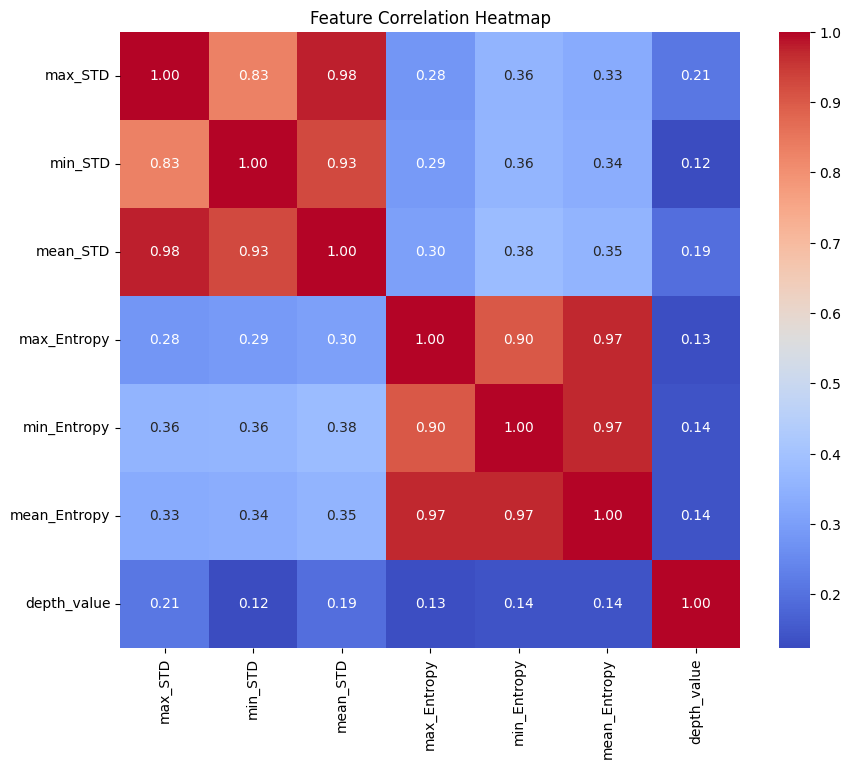

In [48]:
# Correlation heatmap
features = ['max_STD', 'min_STD', 'mean_STD', 'max_Entropy', 'min_Entropy', 'mean_Entropy', 'depth_value']
plt.figure(figsize=(10, 8))
sns.heatmap(combined_df[features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Feature importance analysis with Random Forest
X = combined_df[features[:2]]
y = combined_df['depth_value']


X= X.to_numpy()
y= y.to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature scaling
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # Train MLP Regressor Model
mlp_reg = MLPRegressor(hidden_layer_sizes=(10, ), activation='relu', solver='sgd', max_iter=2000, random_state=42)
mlp_reg.fit(X_train_scaled, y_train)

# # Evaluate model
predictions = mlp_reg.predict(X_test_scaled)
print("\nMLP Regression Evaluation:")
print(f'RMSE: {mean_squared_error(y_test, predictions, squared=False):.4f}')
print(f'MAE: {mean_absolute_error(y_test, predictions):.4f}')
print(f'R^2 Score: {r2_score(y_test, predictions):.4f}')


MLP Regression Evaluation:
RMSE: 0.8153
MAE: 0.7117
R^2 Score: 0.0518


In [54]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,        # Limit tree depth
    min_samples_split=5, # Prevent overfitting
    random_state=42
)

rf.fit(X_train, y_train)

# Evaluate model
predictions = rf.predict(X_test)
print("\nRandom Forest Regression Evaluation:")
print(f'RMSE: {mean_squared_error(y_test, predictions, squared=False):.4f}')
print(f'MAE: {mean_absolute_error(y_test, predictions):.4f}')
print(f'R^2 Score: {r2_score(y_test, predictions):.4f}')


Random Forest Regression Evaluation:
RMSE: 0.8083
MAE: 0.6985
R^2 Score: 0.0681
